In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

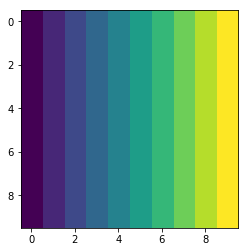

In [2]:
x = np.zeros((10, 10))
for i in range(10):
    x[:, i] = i
plt.imshow(x)

In [176]:
class RecurrentProp(nn.Module):

    def __init__(self, input_size):
        super(RecurrentProp, self).__init__()
        self.input_size = input_size

        self.weight = torch.nn.Parameter(torch.eye(self.input_size))

    def forward(self, data):
        N, C, H, W = data.shape
        assert C == self.input_size, "%d vs %d" % (C, self.input_size)
        previous = torch.zeros((self.input_size))
        # left to right
        output0 = torch.tensor(data)
        for x in range(1, W):
            data1 = output0[:, :, :, x-1]
            # N, C, H --> N, H, C
            data1 = torch.transpose(data1, 1, 2).contiguous()
            data1 = data1.view(-1, self.input_size)
            tmp = torch.mm(data1, self.weight)
            tmp = torch.reshape(tmp, (N, H, C))
            # N, H, C --> N, C, H
            tmp = torch.transpose(tmp, 1, 2).contiguous()
            output0[:, :, :, x] += tmp
        
        # right to left
        output1 = torch.tensor(data)
        for x in range(W-2, -1, -1):
            data1 = output1[:, :, :, x+1]
            # N, C, H --> N, H, C
            data1 = torch.transpose(data1, 1, 2).contiguous()
            data1 = data1.view(-1, self.input_size)
            tmp = torch.mm(data1, self.weight)
            tmp = torch.reshape(tmp, (N, H, C))
            # N, H, C --> N, C, H
            tmp = torch.transpose(tmp, 1, 2).contiguous()
            output1[:, :, :, x] += tmp
            
        # top down
        output2 = torch.tensor(data)
        for y in range(1, H):
            # data of previous row
            data1 = output2[:, :, y-1, :]
            # N, C, W --> N, W, C
            data1 = torch.transpose(data1, 1, 2).contiguous()
            data1 = data1.view(-1, self.input_size)
            tmp = torch.mm(data1, self.weight)
            tmp = torch.reshape(tmp, (N, H, C))
            # N, W, C --> N, C, W
            tmp = torch.transpose(tmp, 1, 2).contiguous()
            output2[:, :, y, :] += tmp
        
         # bottom up
        output3 = torch.tensor(data)
        for y in range(H-2, -1, -1):
            # data of previous row
            data1 = output3[:, :, y+1, :]
            # N, C, W --> N, W, C
            data1 = torch.transpose(data1, 1, 2).contiguous()
            data1 = data1.view(-1, self.input_size)
            tmp = torch.mm(data1, self.weight)
            tmp = torch.reshape(tmp, (N, H, C))
            # N, W, C --> N, C, W
            tmp = torch.transpose(tmp, 1, 2).contiguous()
            output3[:, :, y, :] += tmp

        return torch.cat((output0, output1, output2, output3), dim=1)

In [177]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.recurrent = RecurrentProp(input_size=5, hidden_size=5)
    def foward(self, x):
        return self.recurrent(x)

In [178]:
input_size = 3
model = RecurrentProp(input_size=input_size)

x = torch.ones((1, input_size, 5, 5))
output = model(x)

In [179]:
output

tensor([[[[1., 2., 3., 4., 5.],
          [1., 2., 3., 4., 5.],
          [1., 2., 3., 4., 5.],
          [1., 2., 3., 4., 5.],
          [1., 2., 3., 4., 5.]],

         [[1., 2., 3., 4., 5.],
          [1., 2., 3., 4., 5.],
          [1., 2., 3., 4., 5.],
          [1., 2., 3., 4., 5.],
          [1., 2., 3., 4., 5.]],

         [[1., 2., 3., 4., 5.],
          [1., 2., 3., 4., 5.],
          [1., 2., 3., 4., 5.],
          [1., 2., 3., 4., 5.],
          [1., 2., 3., 4., 5.]],

         [[5., 4., 3., 2., 1.],
          [5., 4., 3., 2., 1.],
          [5., 4., 3., 2., 1.],
          [5., 4., 3., 2., 1.],
          [5., 4., 3., 2., 1.]],

         [[5., 4., 3., 2., 1.],
          [5., 4., 3., 2., 1.],
          [5., 4., 3., 2., 1.],
          [5., 4., 3., 2., 1.],
          [5., 4., 3., 2., 1.]],

         [[5., 4., 3., 2., 1.],
          [5., 4., 3., 2., 1.],
          [5., 4., 3., 2., 1.],
          [5., 4., 3., 2., 1.],
          [5., 4., 3., 2., 1.]],

         [[1., 1., 1., 1., 1

In [153]:
list(range(10, 1, -1))

[10, 9, 8, 7, 6, 5, 4, 3, 2]